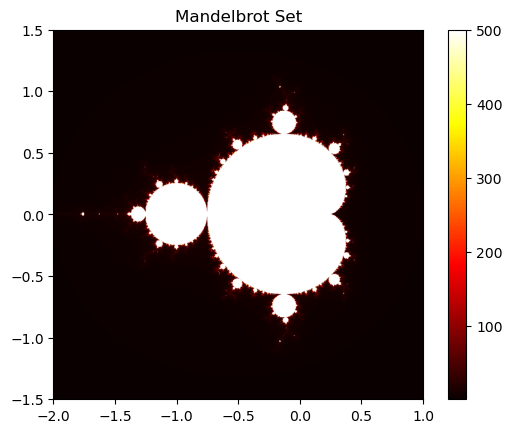

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    """
    Generate the Mandelbrot set.
    
    Parameters:
    xmin, xmax : float - Range of x-axis
    ymin, ymax : float - Range of y-axis
    width, height : int - Size of the image
    max_iter : int - Maximum number of iterations to determine membership in the set
    """

    # Create a 2D array to hold the pixel values
    image = np.zeros((height, width))
    
    # Generate a grid of complex numbers
    for x in range(width):
        for y in range(height):
            zx = np.linspace(xmin, xmax, width)[x]
            zy = np.linspace(ymin, ymax, height)[y]
            c = complex(zx, zy)
            z = 0
            n = 0
            
            # Iterate to determine membership in the Mandelbrot set
            while abs(z) <= 2 and n < max_iter:
                z = z*z + c
                n += 1
            
            # Color the pixel based on the number of iterations
            image[y, x] = n
    
    return image

# Parameters for the Mandelbrot set
xmin = -2.0
xmax = 1.0
ymin = -1.5
ymax = 1.5
width = 1000
height = 800
max_iter = 500  # Change this value to see different levels of detail

# Generate and display the Mandelbrot set
mandelbrot_image = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Display the fractal using matplotlib
plt.imshow(mandelbrot_image, extent=(xmin, xmax, ymin, ymax), cmap='hot')
plt.colorbar()
plt.title('Mandelbrot Set')
plt.show()

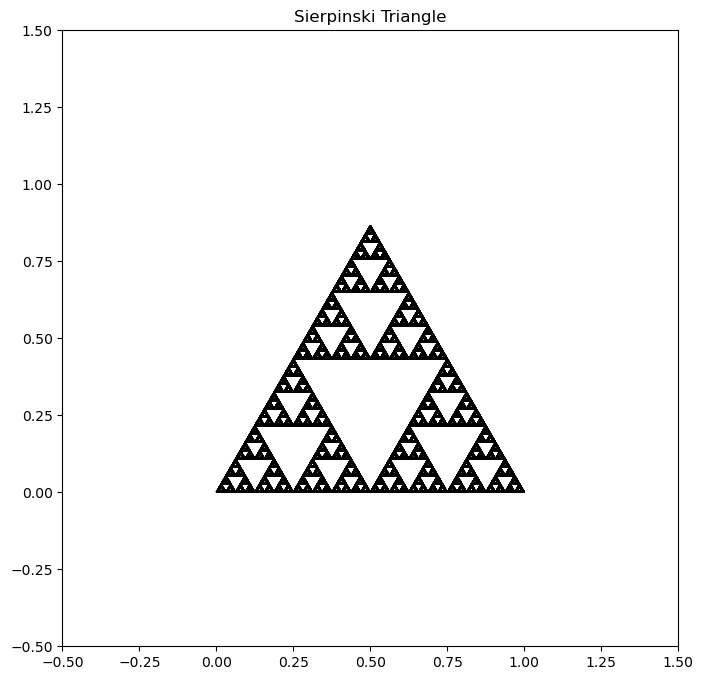

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski_triangle(vertices, depth):
    """
    Create points for the Sierpinski Triangle using recursion.
    
    Parameters:
    vertices : list - List of vertices of the triangle
    depth : int - Number of recursive subdivisions to perform
    """
    # Base case: if depth is 0, return the vertices as a single triangle
    if depth == 0:
        return [vertices]

    # Calculate the midpoints of the triangle's edges
    midpoints = [
        [(vertices[0][0] + vertices[1][0]) / 2, (vertices[0][1] + vertices[1][1]) / 2],
        [(vertices[1][0] + vertices[2][0]) / 2, (vertices[1][1] + vertices[2][1]) / 2],
        [(vertices[0][0] + vertices[2][0]) / 2, (vertices[0][1] + vertices[2][1]) / 2],
    ]

    # Recursively generate smaller triangles
    return (sierpinski_triangle([vertices[0], midpoints[0], midpoints[2]], depth - 1) +
            sierpinski_triangle([vertices[1], midpoints[0], midpoints[1]], depth - 1) +
            sierpinski_triangle([vertices[2], midpoints[1], midpoints[2]], depth - 1))

# Set the vertices of the triangle and the recursion depth
vertices = [[0, 0], [1, 0], [0.5, (3 ** 0.5) / 2]]  # Equilateral triangle
depth = 13  # Change this value to see different levels of detail

# Generate the Sierpinski Triangle
triangles = sierpinski_triangle(vertices, depth)

# Plot the results
plt.figure(figsize=(8, 8))
for triangle in triangles:
    polygon = plt.Polygon(triangle, edgecolor='black')
    plt.gca().add_patch(polygon)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.title('Sierpinski Triangle')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()